Xshape: (100, 2)
y shape: (100,)


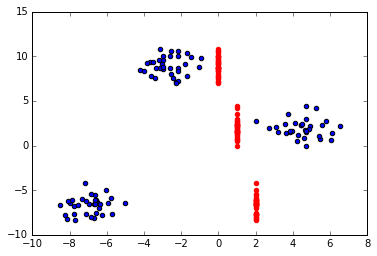

In [15]:
# the purpose of clustering is to find or identify groups of similar objects
# K-mean clustering (place centroids in the "center" of the different identified groups)
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print('Xshape:', X.shape)
print('y shape:', y.shape)
#fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(y,X[:,1], color='red')


labels: [1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
y     : [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
Correct clustering but wimply wrong labels


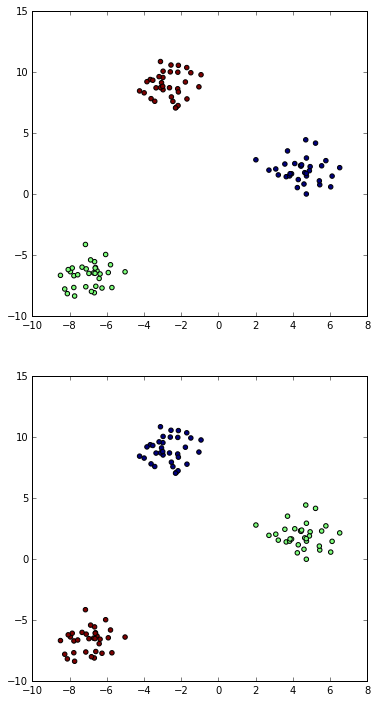

Acuracy score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]
function exist to adjust the score to this case (when predictions(labels) are shifted)
Adjusted random score: 1.0


In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=42)
# At this point we can see the worst part of the kmeans algorithm : We have to manually enter the number of clusters`
# That means that we already know how many clusters we are looking for.

labels = kmeans.fit_predict(X)
# the previous statement is equivalent to :
# kmeans.fit(X)
# labels = kmeans.predict(X)
print('labels:', labels)
print('y     :', y)
# as we can see, the kmeans found the correct group, but not the correct labels... :
all(y == labels)

print('Correct clustering but wimply wrong labels')
plt.figure(figsize=(6,12))
plt.subplot(211)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.subplot(212)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score
print('Acuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

print('function exist to adjust the score to this case (when predictions(labels) are shifted)')
from sklearn.metrics import adjusted_rand_score
print('Adjusted random score:', adjusted_rand_score(y, labels))

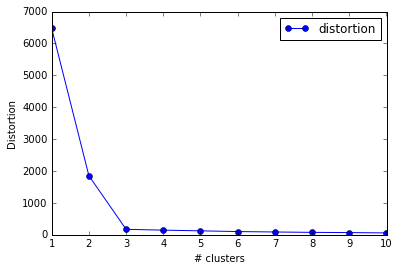

In [3]:
# Elbow method
# To circumvent to the problem of knowing the # of clusters before, the elbow method can help us

distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
    
plt.plot(range(1,11), distortions, marker='o', label='distortion')
plt.xlabel('# clusters')
plt.ylabel('Distortion')
plt.legend()
plt.show()



Transformation: [[ 0.60834549 -0.63667341]
 [-0.40887718  0.85253229]]
X shape: (600, 2)


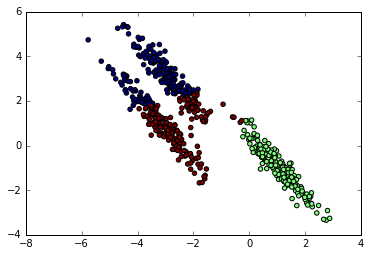

In [16]:
# Clustering algotrithm makeassumptions, especially in this case of spherical groups in space for the data
# We can create a dataset where the algorithm will totally fail

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
print('Transformation:', transformation)

X = np.dot(X, transformation)
print('X shape:', X.shape)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()




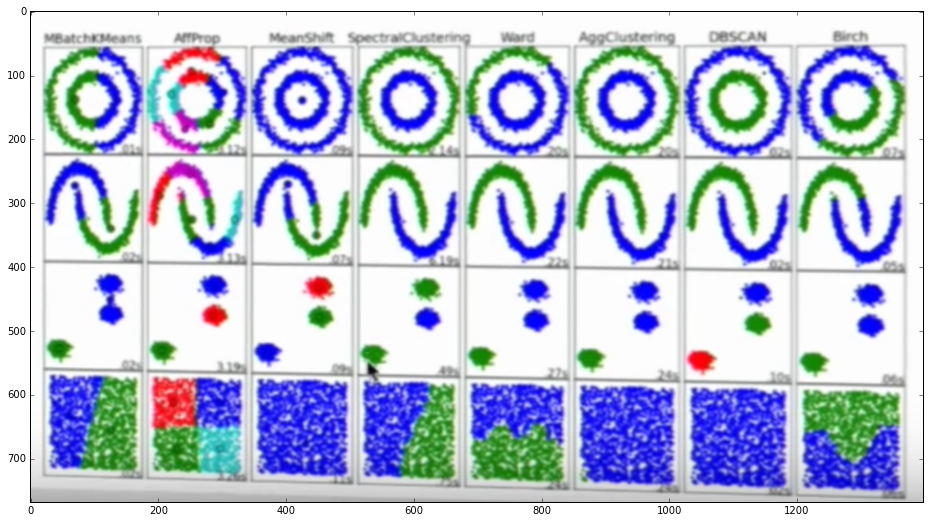

In [17]:
# There are other algorithm to avoid this
# Meanshift : can find better looking clusters, but not usable on big datasets
# DBSCAN : can find irregularly shaped clusters based on density
# Affinity propagation : based on message passing from one point to another
# Spectral clustering : Kmeans applied to a projection of the normalized Laplacian graph
# Ward : hierarchical clustering. Minimize the sum of the squared differences within all clusters

#from IPython.display import Image
from PIL import Image
pil_im = Image.open('files/clustering algo.png', 'r')
plt.figure(figsize=(16,16))
plt.imshow(np.asarray(pil_im))

#Image(filename='files/clustering algo.png')

Acuracy score: 0.326666666667
[[  0   0   0   0   0]
 [  2   0 198   0   0]
 [  0 195   0   0   5]
 [  4   0   0 196   0]
 [  0   0   0   0   0]]


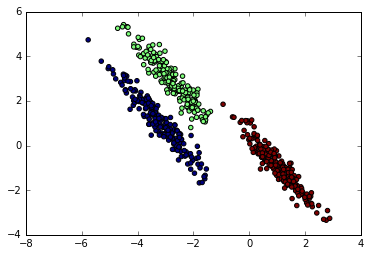

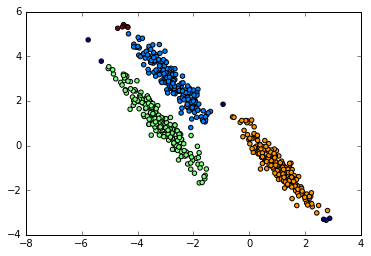

function exist to adjust the score to this case (when predictions(labels) are shifted)
Adjusted random score: 0.9726245647623428


In [51]:
# So let's try to use DBScan on our blob.
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.41,min_samples=6, algorithm='brute')
y_predict = db.fit_predict(X)
#print('y:', y)
#print('y predict:', y_predict)
from sklearn.metrics import confusion_matrix, accuracy_score
print('Acuracy score:', accuracy_score(y, y_predict))
print(confusion_matrix(y, y_predict))

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.show()

print('function exist to adjust the score to this case (when predictions(labels) are shifted)')
from sklearn.metrics import adjusted_rand_score
print('Adjusted random score:', adjusted_rand_score(y, y_predict))

data.shape: (1797, 64)
clusters centers: (10, 64)


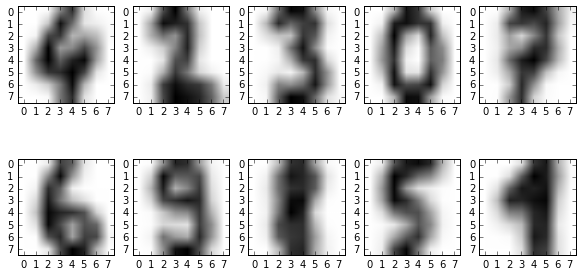

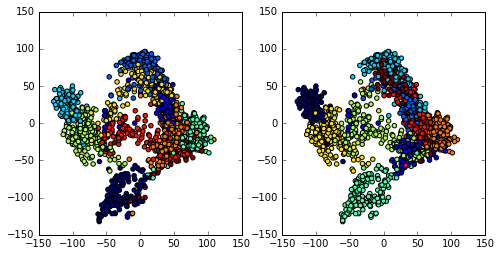

In [63]:
# Apply this to the digits
from sklearn.datasets import load_digits
digits = load_digits()
print('data.shape:', digits.data.shape)

km = KMeans(n_clusters=10)
y_digits = km.fit_predict(digits.data)
print('clusters centers:', km.cluster_centers_.shape)

# Display centers
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2,5, i+1)
    ax.imshow(km.cluster_centers_[i].reshape((8,8)),
             cmap=plt.cm.binary)
    
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)
    
#Display projected data
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(X_iso[:,0], X_iso[:,1], c=y_digits)
ax[1].scatter(X_iso[:,0], X_iso[:,1], c=digits.target)